In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from gmpy2 import mpz

In [2]:
data = pd.read_csv("../../passed_cbrt_test_samples.csv")
data

,input,cbrt_ideal,cbrt_implementation,gas_used
0,0,0,0,467
1,0,0,0,467
2,116,4876998961073,4876998961073,32448
3,0,0,0,467
4,574666518,831390960337671,831390960337671,19448
...,...,...,...,...
8469,7466,19544714395821,19544714395821,29068
8470,85,4396829672158,4396829672158,32708
8471,4283,16239875349897,16239875349897,29588
8472,4283,16239875349897,16239875349897,29588


In [20]:
data.describe()

,gas_used
count,8474.000000
mean,26083.027024
std,9628.025694
min,467.000000
25%,27248.000000
50%,28288.000000
75%,32188.000000
max,36608.000000


Text(0.5, 0, 'Gas Consumed')

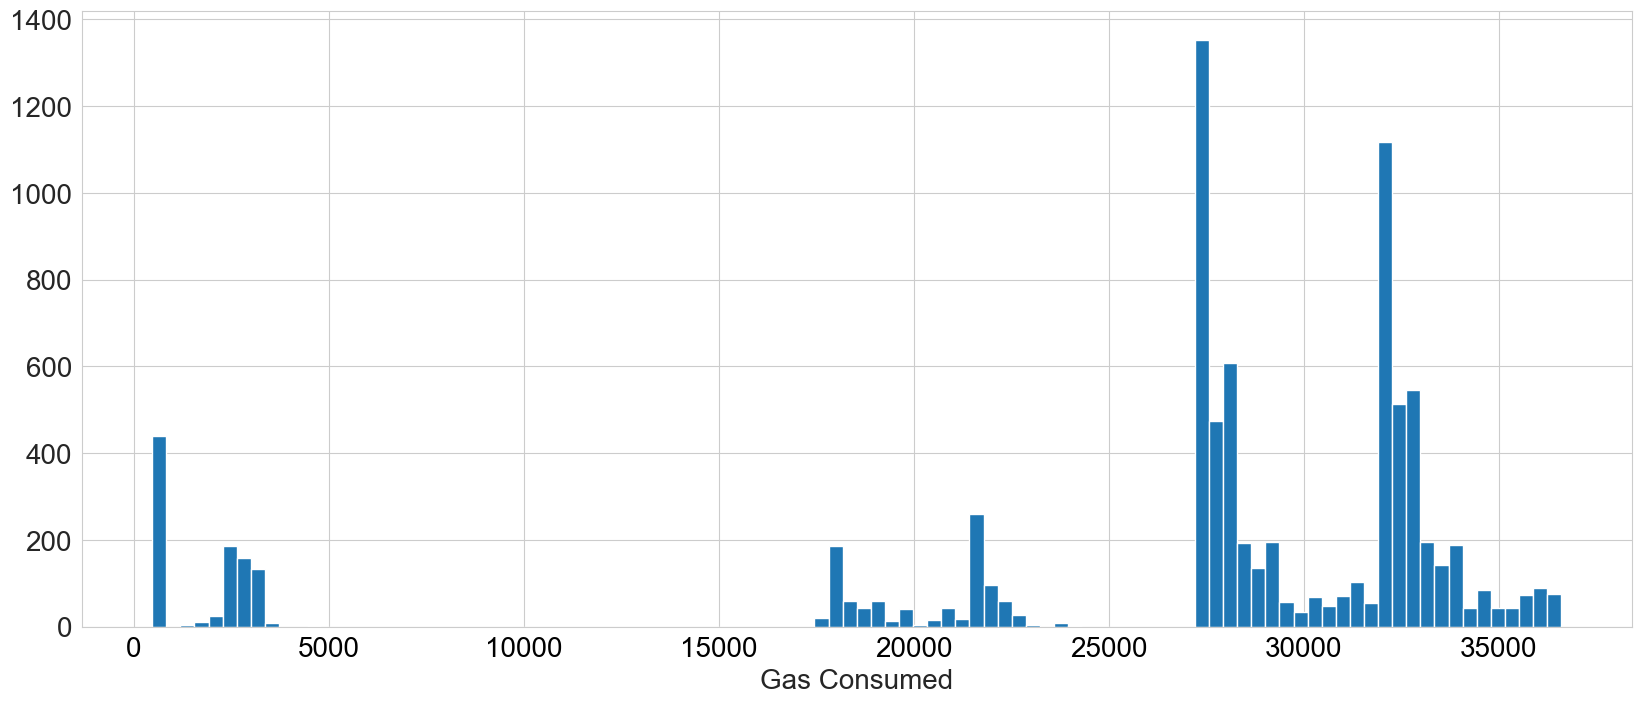

In [12]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.hist(data.gas_used, 100)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')

ax.set_xlabel("Gas Consumed", fontsize=20)

In [5]:
data.input = data.input.apply(lambda x: mpz(x))

In [24]:
segmented_data = [
    data[data.gas_used < 10000], 
    data[(data.gas_used > 10000) & (data.gas_used < 25000)], 
    data[data.gas_used > 25000],
]
labels = ["Low Gas", "Medium Gas", "High Gas"]

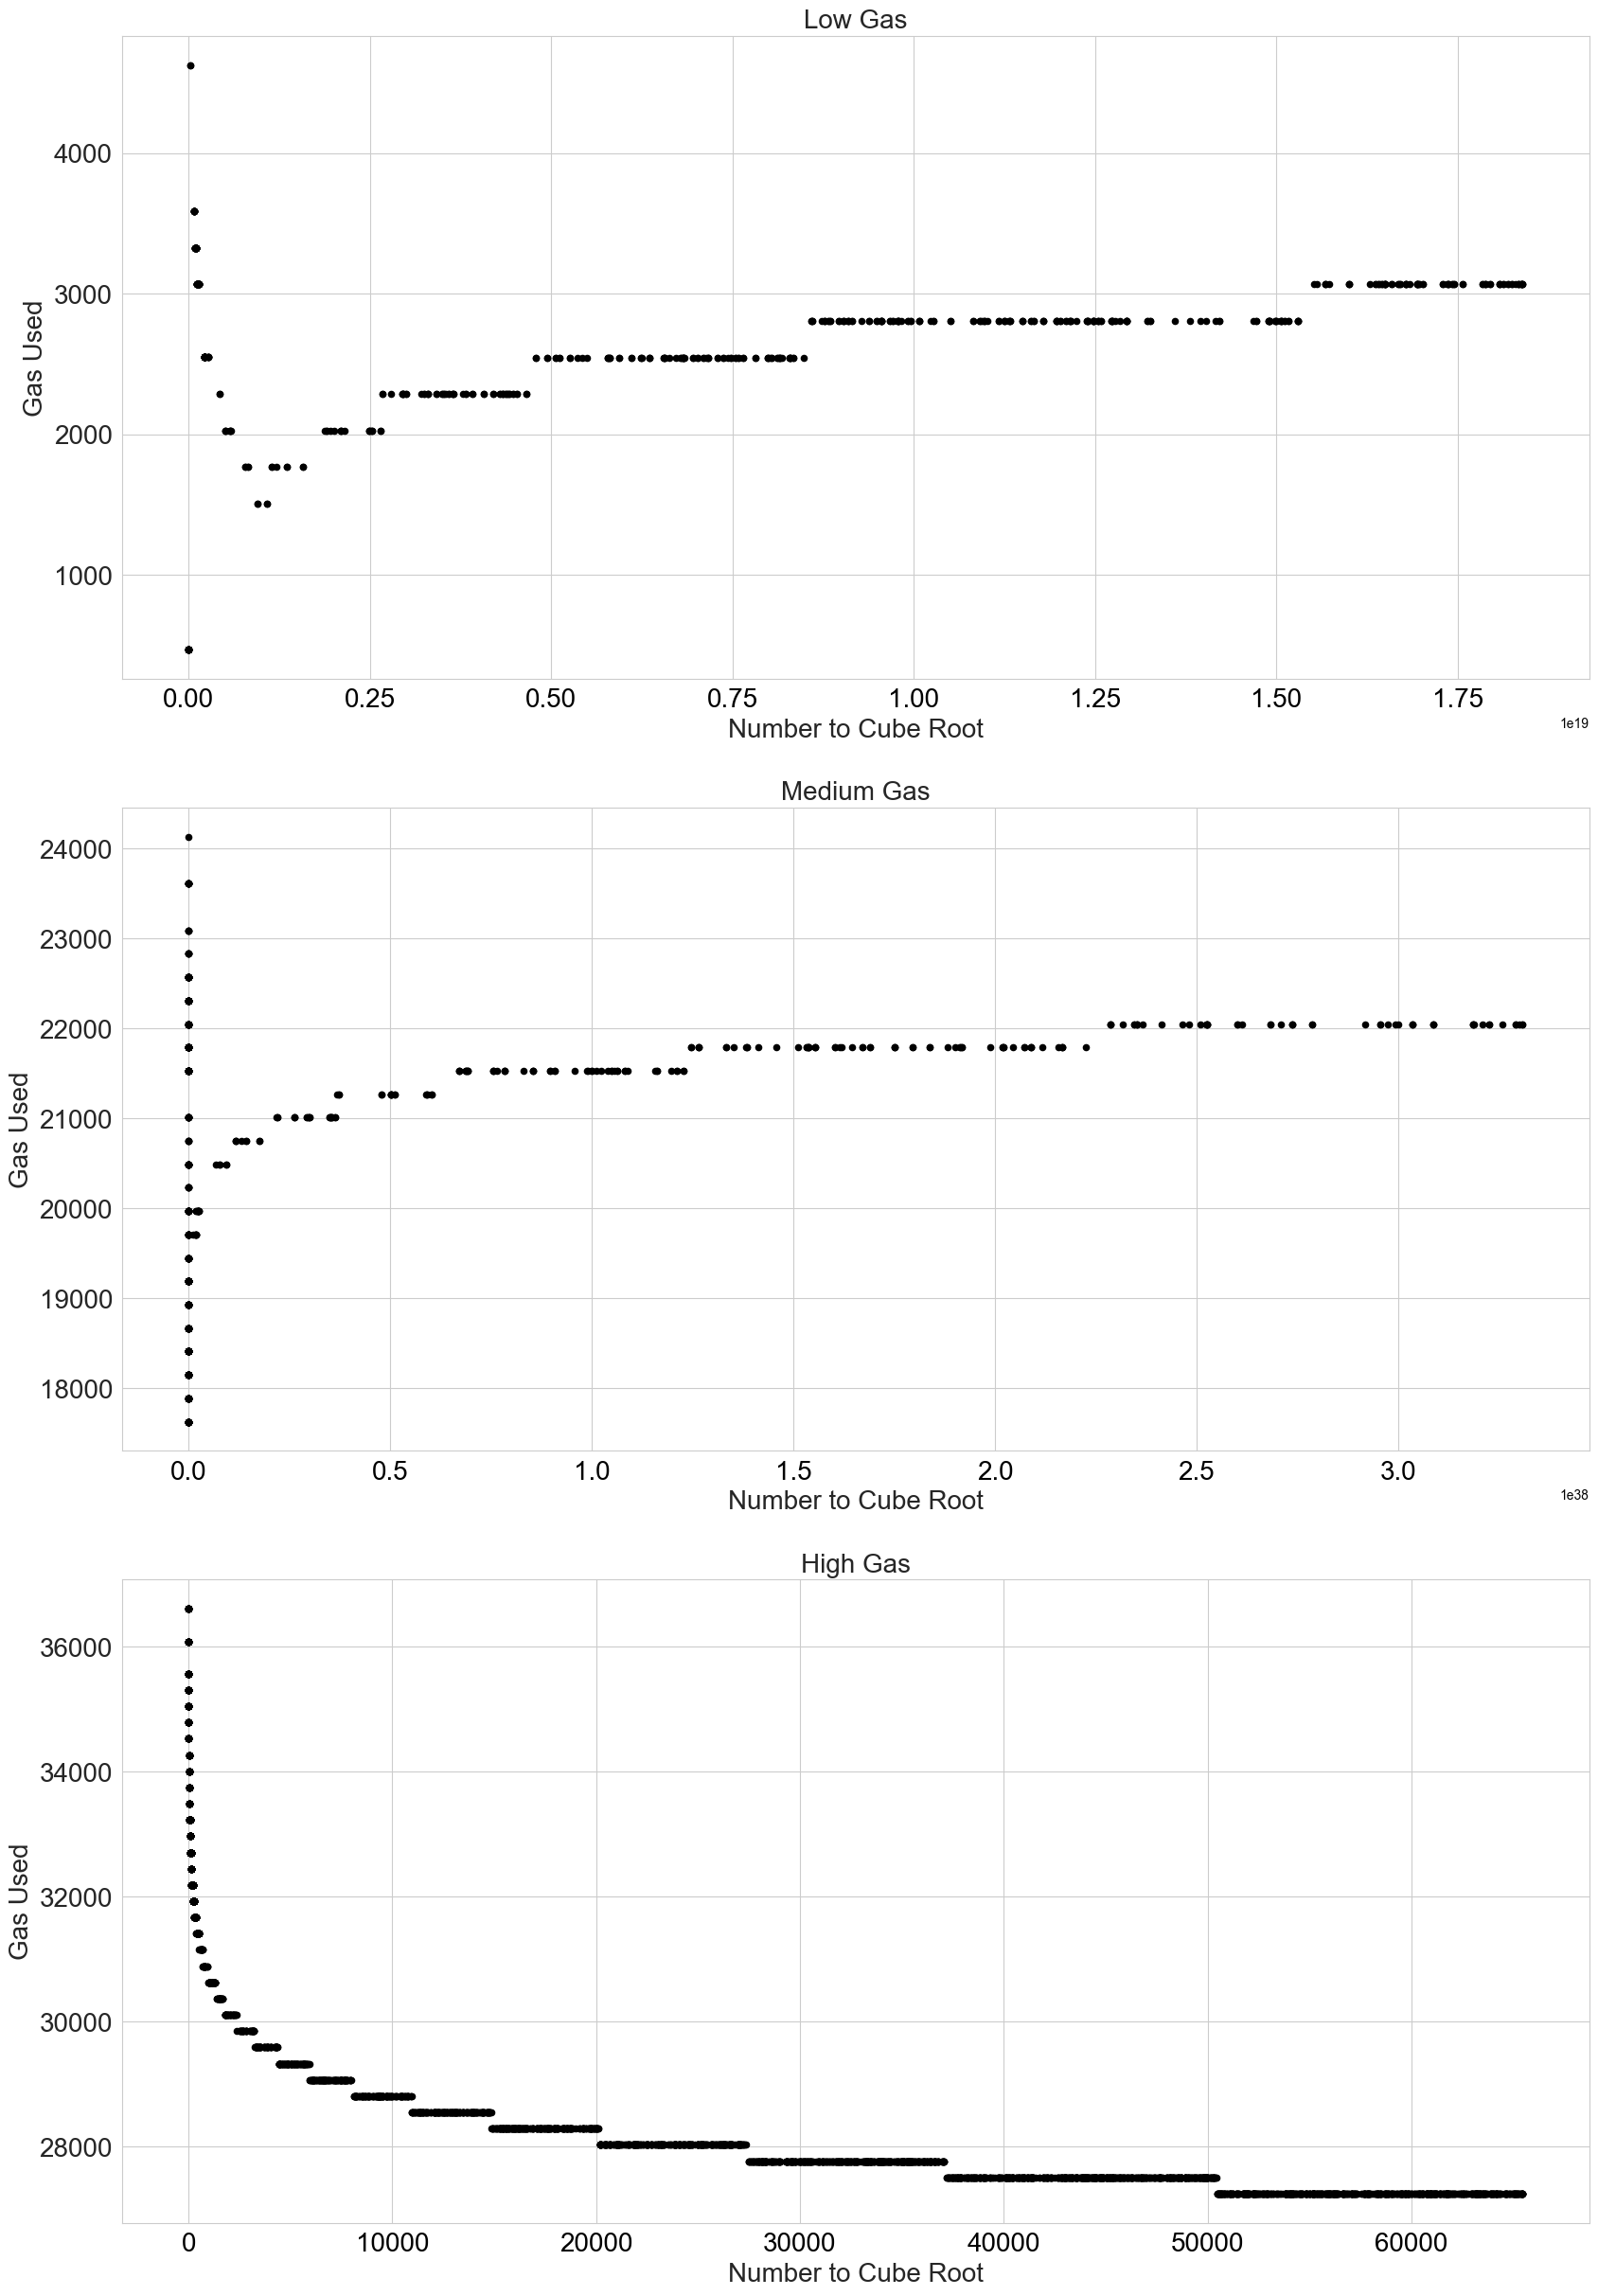

In [25]:
fig, axes = plt.subplots(3,1, figsize=(20, 30))


for ix, ax in enumerate(axes):
    
    _data = segmented_data[ix]
    
    ax.scatter(
        _data.input,
        _data.gas_used,
        s=20,
        color="black",
    )

    ax.set_xlabel("Number to Cube Root", fontsize=20)
    ax.set_ylabel("Gas Used", fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', colors='black')
    ax.set_title(labels[ix], fontsize=20)

Text(0.5, 1.0, 'Input < 10 ** 10, 17000 < Gas < 25000 ')

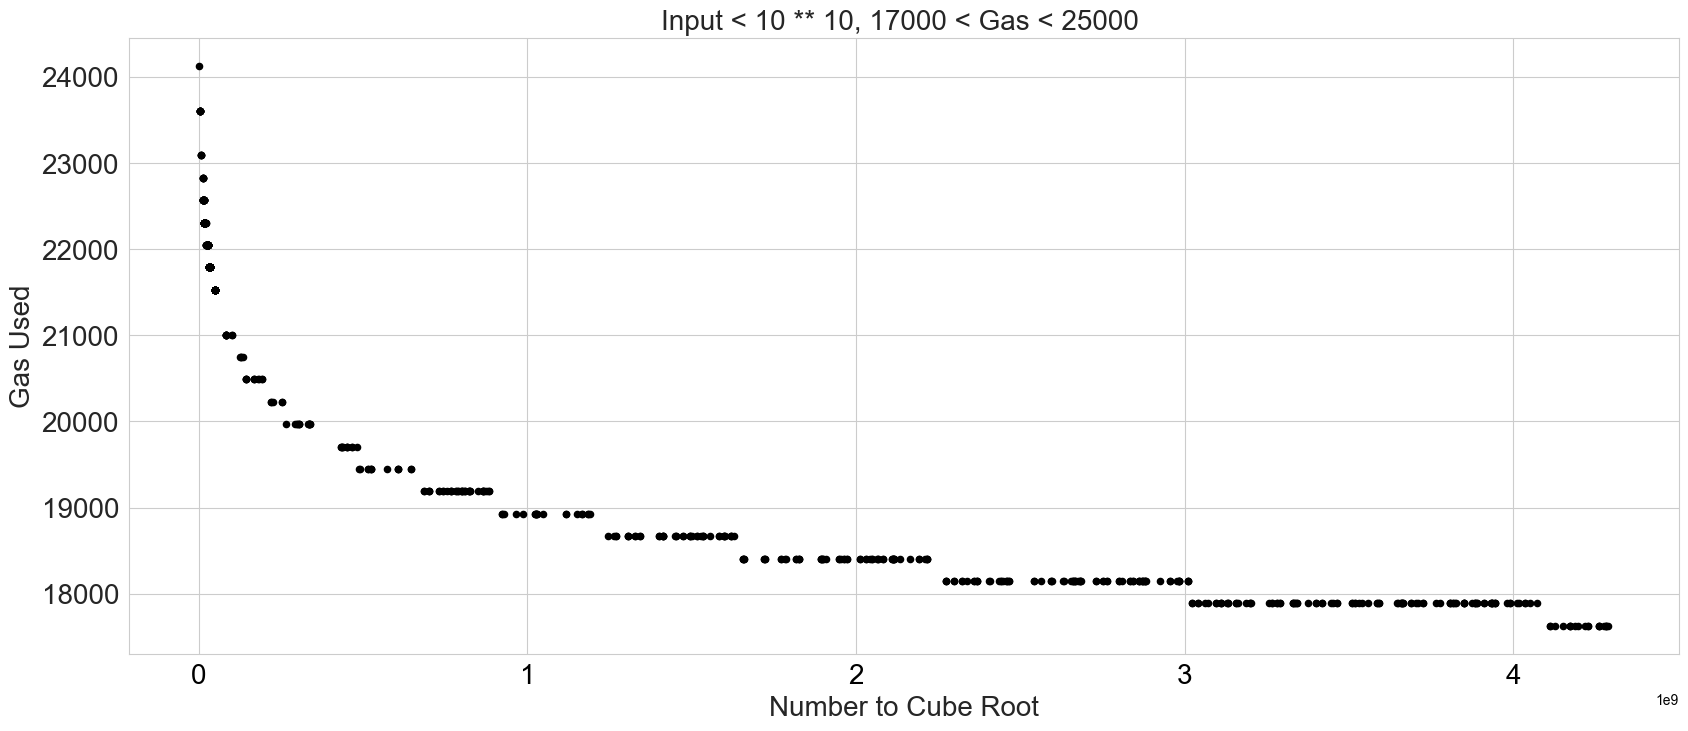

In [38]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

_data = segmented_data[1][segmented_data[1].input < 10 ** 10]

ax.scatter(
    _data.input,
    _data.gas_used,
    s=20,
    color="black",
)

ax.set_xlabel("Number to Cube Root", fontsize=20)
ax.set_ylabel("Gas Used", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.set_title("Input < 10 ** 10, 17000 < Gas < 25000 ", fontsize=20)


Text(0.5, 1.0, 'Input > 10 ** 10, 17000 < Gas < 25000 ')

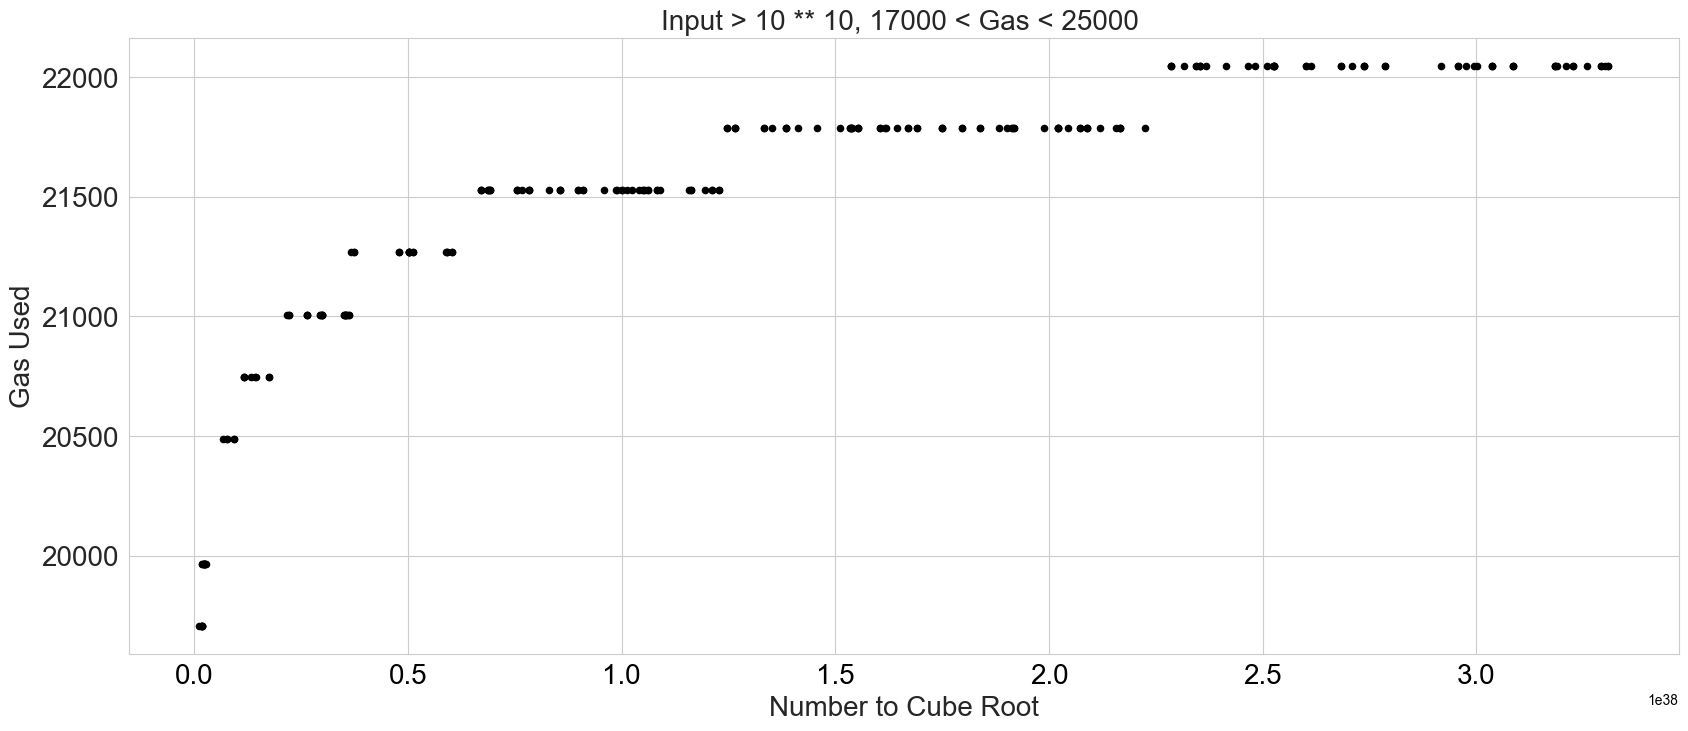

In [39]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

_data = segmented_data[1][segmented_data[1].input > 10 ** 10]

ax.scatter(
    _data.input,
    _data.gas_used,
    s=20,
    color="black",
)

ax.set_xlabel("Number to Cube Root", fontsize=20)
ax.set_ylabel("Gas Used", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.set_title("Input > 10 ** 10, 17000 < Gas < 25000 ", fontsize=20)
